## L07: Create a preliminar version of the Dst index

In [9]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np

# our library
import i4s_lib as i4s

folder='i4s_geomag_data/'
month='201303'

# observatories used in Dst index
obs=['her','hon','kak','sjg']



# Get the data for all the days of the month in the variable "dat"

In [10]:
# days to observe: the whole month '01' - '31'
qs=pd.Series(range(1,32))
qs=pd.Series.tolist(qs.apply(lambda x: '{0:0>2}'.format(x)))
print(qs)

# variable to contain all the values (1440 minutes) of all four observatories,
# for the all the days
dat = np.zeros([len(obs),len(qs),1440])

# read all the days of the month for each observatory (only the H component (c1))
for o in obs:
    for q in qs:
        filename=o + month + q + '*min.min'
        df=i4s.read_im(filepattern=filename,folder=folder)
        data=df['data']
        dat[obs.index(o)][qs.index(q)][:]=data.c1

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']


# Get only the quiet days (IQDs) in the variable "dat_quiets"

In [11]:
# quiets days for the month of March 2013
qs=['08','07','26','25','13']

# variable to contain all the values (1440 minutes) of all four observatories,
# for the five quietest days
dat_quiets = np.zeros([len(obs),len(qs),1440])

# read the quietest days of the month for each observatory (only the H component (c1))
for o in obs:
    for q in qs:
        filename=o + month + q + '*min.min'
        df=i4s.read_im(filepattern=filename,folder=folder)
        data=df['data']
        dat_quiets[obs.index(o)][qs.index(q)][:]=data.c1

# Let's display the original data for the whole month (before removing solar regular variation)

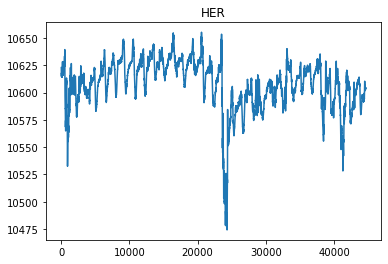

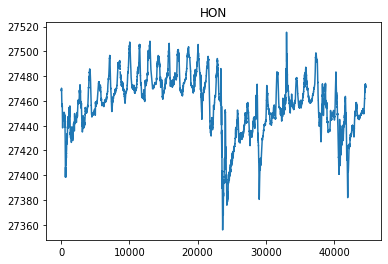

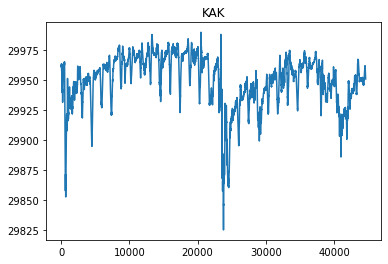

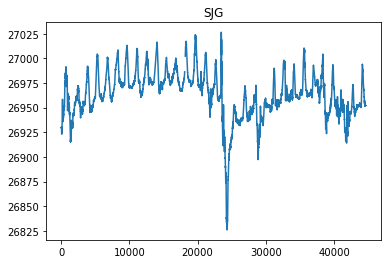

In [12]:
# All the days of the month for each observatory
for io in range(4): # iterate on the observatories
    plt.plot(dat[io][:][:].reshape(-1));
    plt.title(obs[io].upper())
    plt.show()


In [13]:
# Create a local index (baseline and solar regular variation removed)

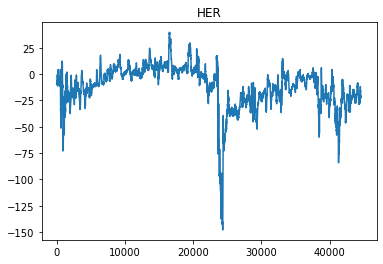

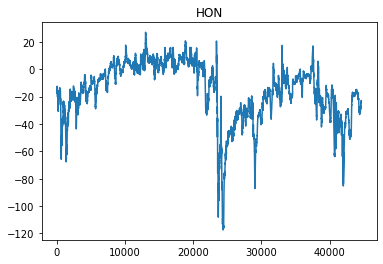

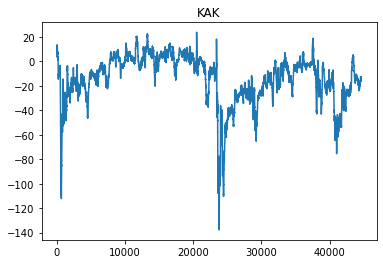

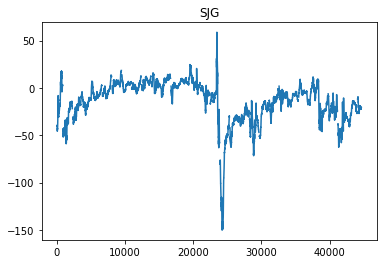

In [14]:
# Create the average quiet day for each observatory
quiets = np.zeros([len(obs),1440])
sq = np.zeros([len(obs),31,1440]) # variable that contains for the four observatories, 31 days of 1440 minutes

for io in range(4): # iterate on observatories
    quiets[io][:]=np.mean(dat_quiets[io][:][:],axis=0)
    for i in range(31): # Replicate the quiet day the whole month for each observatory
        sq[io][i][:] = quiets[io][:]
    loc_ind=dat[io][:][:]-sq[io][i][:] # Create local indices substracting the replicated average quiet day
    
    plt.plot(loc_ind.reshape(-1));
    plt.title(obs[io].upper())
    plt.show()

## Q01: Explain what are the two main differences between these figures and the previous ones

### A01:

# Create our version of the Dst index from the four local indices

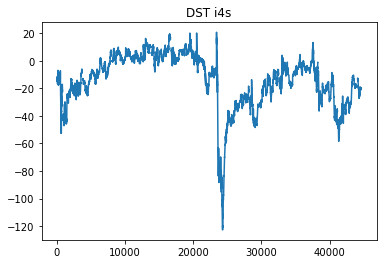

In [15]:
loc_inds = dat[:][:][:]-sq[:][:][:] # Save local indices in a variable
dst_i4s = np.mean(loc_inds,axis=0)
plt.plot(dst_i4s.reshape(-1));
plt.title('DST i4s')
plt.show()

## Q02: How has this version of Dst index being created?

### A02:

## Q03: Compare the result with the original Dst index from Kyoto WDC website, what differences do you see?

### A03:

## Q04: Compare the official method to obtain the Dst index, the one published in the Kyoto WDC web and comment the most significants differences.

In [16]:
### A04: